<a href="https://colab.research.google.com/github/hamednasr/TensorFlow-Projects/blob/main/Predict_Bitcoind_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict Bitcoind Price
### In this project, I predict Bitcoind price using Tensorflow Time Series 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
display.set_matplotlib_formats('svg')

## Get Data:

In [2]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2022-09-07 02:31:17--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.009s  

2022-09-07 02:31:17 (19.4 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [3]:
bit_df = pd.read_csv('/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv',
            parse_dates = ['Date'],
            index_col = ['Date'])
bit_df.head()

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566


In [4]:
bitcoin_price = pd.DataFrame(bit_df['24h Open (USD)'])
bitcoin_price.head()

,24h Open (USD)
Date,
2013-10-01,124.30466
2013-10-02,123.65499
2013-10-03,125.45500
2013-10-04,108.58483
2013-10-05,118.67466


In [5]:
bitcoin_price.rename({'24h Open (USD)':'price'}, axis = 1 , inplace =True)
bitcoin_price.head()

,price
Date,
2013-10-01,124.30466
2013-10-02,123.65499
2013-10-03,125.45500
2013-10-04,108.58483
2013-10-05,118.67466


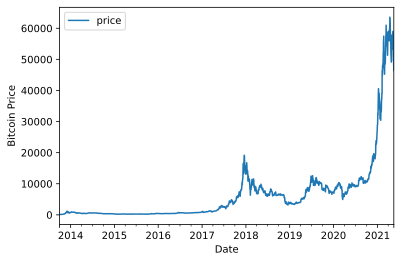

In [6]:
bitcoin_price.plot()
plt.ylabel('Bitcoin Price');

## Train Test Split:

In [16]:
bitcoin_price['price'].to_numpy()

array([  124.30466   ,   123.65499   ,   125.455     , ...,
       49926.03506746, 46805.53785192, 46439.3365698 ])

In [18]:
splitNum = int(0.85 * len(bitcoin_price))
bitcoin_price.index[:splitNum]

DatetimeIndex(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
               '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
               '2013-10-09', '2013-10-10',
               ...
               '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19',
               '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
               '2020-03-24', '2020-03-25'],
              dtype='datetime64[ns]', name='Date', length=2368, freq=None)

In [19]:
splitNum = int(0.85 * len(bitcoin_price))
X_train, y_train = bitcoin_price.index[:splitNum] , bitcoin_price['price'].to_numpy()[:splitNum]
X_test, y_test = bitcoin_price.index[splitNum:] , bitcoin_price['price'].to_numpy()[splitNum:]

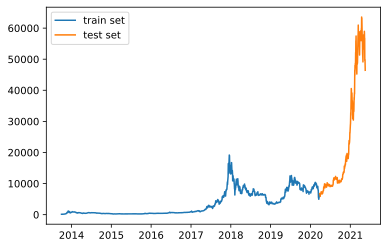

In [23]:
plt.plot(X_train,y_train, label='train set')
plt.plot(X_test,y_test, label='test set')
plt.legend();